In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import utils.plot_utils as plu
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle
from signal_processing import sr_processing as sr
from hu_classes.hu_dataloader import matrics_loader
import numpy as np
from typing import List, Dict,Union, Tuple
from utils import plot_utils as plu


In [2]:
'''
Helper function to efficiently loop through the data
'''
def process_session_tunning(session_path,target_region):
    metrics = matrics_loader(session_path)
    metrics.load_session_matrics()
    regions = metrics.label_dic['region']
    target_region = [i for i in np.unique(regions).tolist() if target_region in i][0]
    coords = np.asarray(metrics.orien_coords) # Ensure coords is a NumPy array
    tuning_curves = metrics.tunning
    tuning_keys = list(tuning_curves.keys())
    baseline_key = tuning_keys[0]
    comparison_keys = tuning_keys[1:]
    baseline_data = tuning_curves[baseline_key]
    baseline_ace = baseline_data[regions == target_region]
    all_amp_means, all_amp_medians = [], []
    all_tunning_means, all_tunning_medians = [], []  
    for key in comparison_keys:
        comparison_data = tuning_curves[key]
        comparison_ace = comparison_data[regions == target_region]
        amps, tunning = sr.calculate_population_tuning_changes(baseline_ace, comparison_ace, coords)
        if len(amps) == 0:
            print(session_path)
            print(target_region)
        all_amp_means.append(np.mean(amps))
        all_amp_medians.append(np.median(amps))
        all_tunning_means.append(np.mean(tunning))
        all_tunning_medians.append(np.median(tunning))
    results_dic = {
        'amp_mean': all_amp_means,
        'amp_med': all_amp_medians,
        'tunning_mean': all_tunning_means,
        'tunning_med': all_tunning_medians,
        'comparisons_made': comparison_keys # Keep track of which comparisons were done
    }
    return results_dic

In [11]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session_path in os.listdir(dat_spike_paths):
    session_path =os.path.join(dat_spike_paths,session_path)
    data_all_dic = {}
    print(f'start a new {session_path}')
    for reg in ['SSp','VISp']:
        res = process_session_tunning(session_path,reg)
        data_all_dic[reg] = res
    save_filename = f"tuning_change_metrics.npy"
    save_path = os.path.join(session_path, save_filename)
    np.save(save_path, data_all_dic)
    pbar.update(1)

100%|██████████| 11/11 [23:26<00:00, 127.91s/it]


start a new /home/tony/Halluci-Nations/scratch/ecephys_717036_2024-06-06_12-32-42_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-05_12-36-57_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-04_13-01-40_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_730049_2024-06-14_12-07-57_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_730049_2024-06-13_12-53-21_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_714789_2024-05-16_13-16-59_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_729461_2024-06-11_12-30-16_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_729461_2024-06-10_12-51-54_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_717036_2024-06-07_12-00-57_nwb_2025-08-03_21-11-22


start a new /home/tony/Halluci-Nations/scratch/ecephys_714527_2024-05-14_13-22-07_nwb_2025-08-03_21-11-22


In [19]:
session = '/home/tony/Halluci-Nations/scratch/ecephys_717036_2024-06-06_12-32-42_nwb_2025-08-03_21-11-22'
metrics_test = matrics_loader(session) 
metrics_test.load_session_matrics()
test = metrics_test.tunning['RFMapping_0']
test2 = metrics_test.tunning['RFMapping_1']
test3 = metrics_test.tunning['RFMapping_2']
test4 = metrics_test.tunning['RFMapping_3']
regions = metrics_test.label_dic['region']
cell_type = metrics_test.label_dic['cell_type']
coords = metrics_test.orien_coords
tar_reg = 'SSp'
target_cell_type = 'RS'
combined_mask = (regions == tar_reg) & (cell_type == target_cell_type)

ace1 = test[combined_mask]
ace2 = test2[combined_mask]
ace3 = test3[combined_mask]
ace4 = test4[combined_mask]


In [20]:
np.unique(cell_type)

array(['FSl', 'FSs', 'RS', 'Tlx3'], dtype=object)

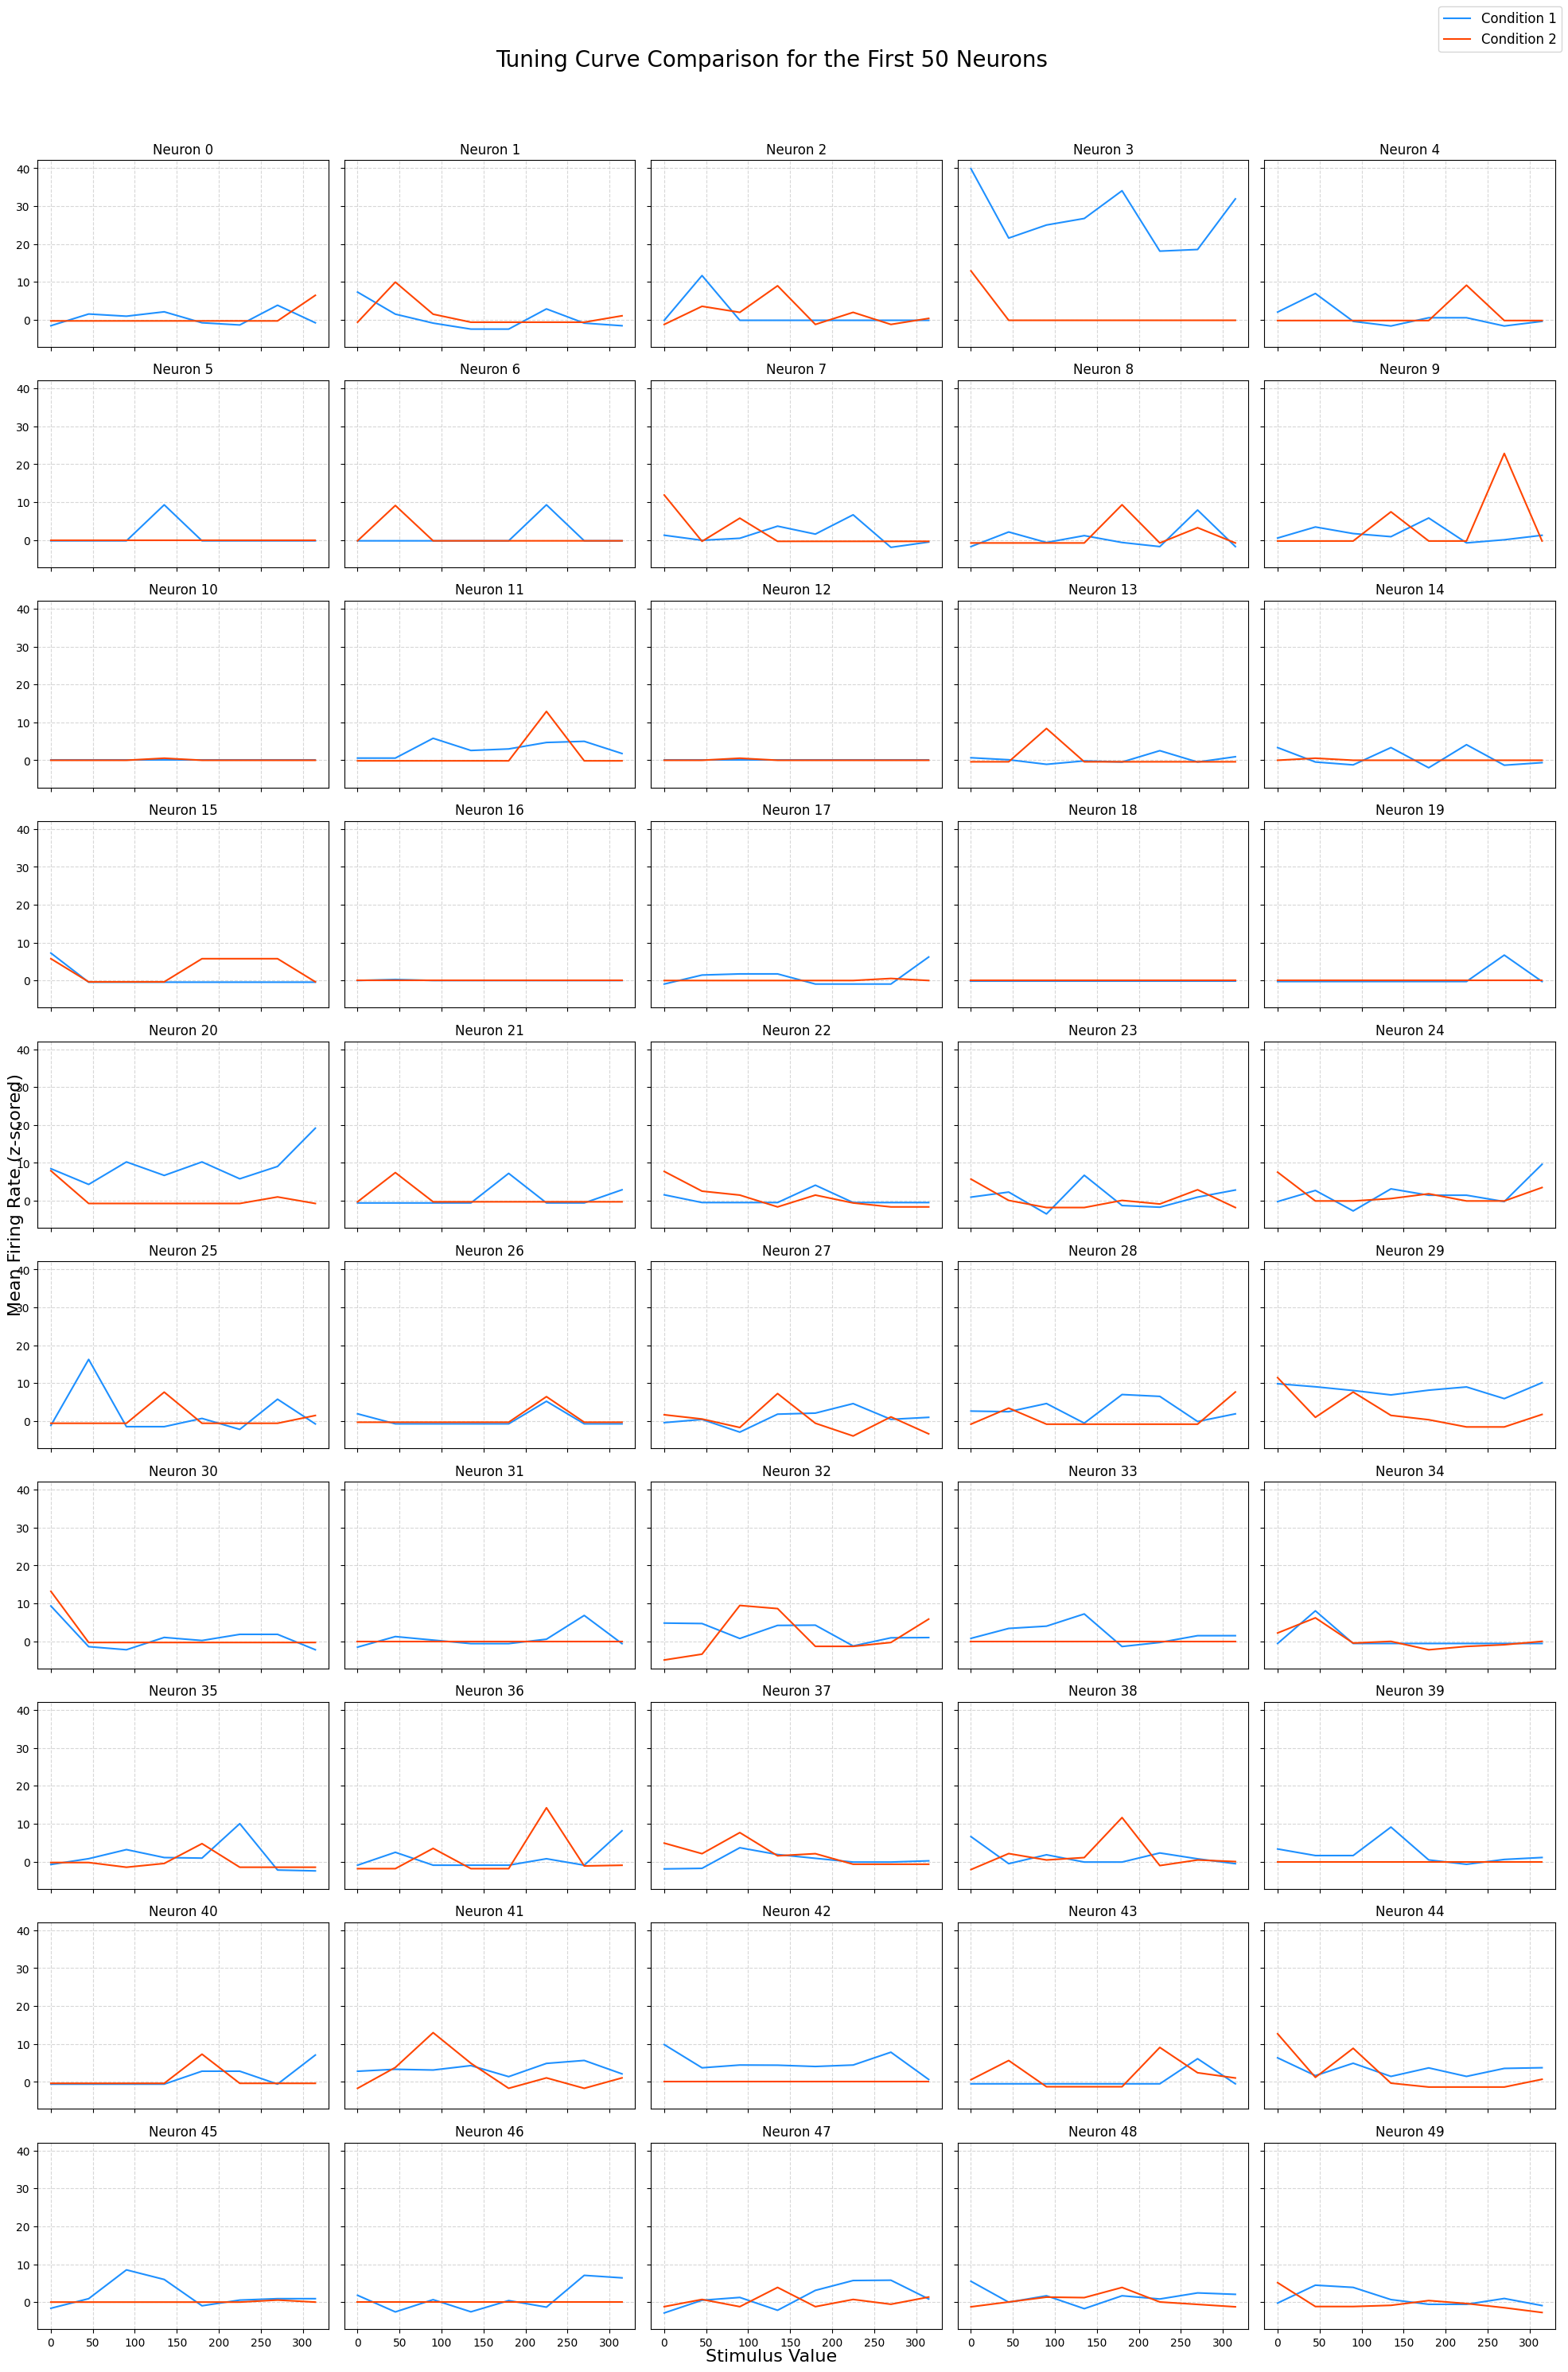

In [ ]:
plu.plot_neuron_tuning_curves(ace2,ace4,coords,num_to_plot=50)
# find consistent stiulus
# stadn drivation low variability 
# mean threhold 
# strong response -> coefficient  mean/
# #croteroa; std 
# normally need 30 trials to average out 